## <center> Time Series Modeling

### Objectives
- Understand and build AR, MA, and ARIMA models
- Compare time series models
- Develop forecasts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
np.random.seed = 47
warnings.filterwarnings('ignore')

## <center> Autoregressive Models (AR)

<center> Today = constant + slope×yesterday + noise

<center> 𝑌𝑡=𝜇+𝜙∗𝑌𝑡−1+𝜖𝑡

In [2]:
## AR
n = 12*10
mu = 8
phi = 0.7
noise_weight = 1
noise = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + noise[i] if i>1 else mu + phi + noise[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

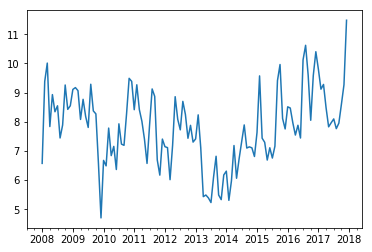

In [3]:
time_series.plot()

In [4]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
ar_model = ARMA(time_series, order=(1,0)).fit()
print(ar_model.summary())
print(ar_model.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 0)   Log Likelihood                -163.041
Method:                       css-mle   S.D. of innovations              0.939
Date:                Wed, 15 Jan 2020   AIC                            332.083
Time:                        18:40:06   BIC                            340.445
Sample:                    01-31-2008   HQIC                           335.479
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8545      0.276     28.412      0.000       7.313       8.396
ar.L1.y        0.6953      0.069     10.037      0.000       0.560       0.831
                                    Roots           

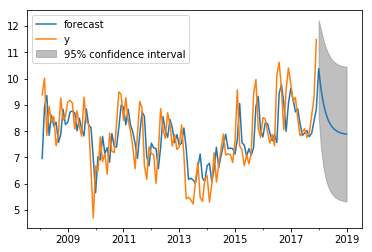

In [5]:
ar_model.plot_predict(1,n+12); plt.show()

## <center> Moving Average Models (MA)

<center> Today = Mean + Noise + Slope×yesterday's noise

<center> 𝑌𝑡=𝜇+𝜖𝑡+𝜃∗𝜖𝑡−1

In [6]:
## MA
n = 12*10
mu = 8
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + theta*errors[i-1] + errors[i] if i>1 else mu + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

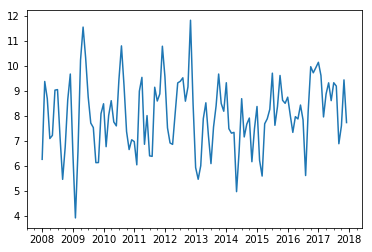

In [7]:
time_series.plot()

In [8]:
ma_model = ARMA(time_series, order=(0,1)).fit()
print(ma_model.summary())
print(ma_model.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(0, 1)   Log Likelihood                -175.874
Method:                       css-mle   S.D. of innovations              1.038
Date:                Wed, 15 Jan 2020   AIC                            357.748
Time:                        18:42:22   BIC                            366.111
Sample:                    01-31-2008   HQIC                           361.144
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0106      0.184     43.643      0.000       7.651       8.370
ma.L1.y        0.9447      0.034     27.928      0.000       0.878       1.011
                                    Roots           

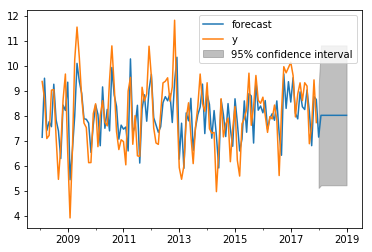

In [9]:
ma_model.plot_predict(1,n+12); plt.show()

## <center> ARMA

<center> Combines both AR and MA components into one model.

<center> 𝑌𝑡 = 𝜇 + 𝜙∗𝑌𝑡−1 + 𝜖𝑡 + 𝜃∗𝜖𝑡−1

In [10]:
## ARMA
n = 12*10
mu = 8
phi = 0.7
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + errors[i] + theta*errors[i-1]  if i>1 else mu + phi + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

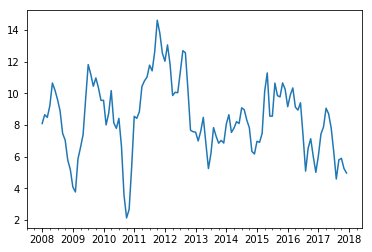

In [11]:
time_series.plot()

In [12]:
arma_model = ARMA(time_series, order=(1,1)).fit()
print(arma_model.summary())
print(arma_model.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                -161.847
Method:                       css-mle   S.D. of innovations              0.907
Date:                Wed, 15 Jan 2020   AIC                            331.695
Time:                        18:44:11   BIC                            342.845
Sample:                    01-31-2008   HQIC                           336.223
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3070      0.545     15.254      0.000       7.240       9.374
ar.L1.y        0.7025      0.065     10.803      0.000       0.575       0.830
ma.L1.y        1.0000      0.039     25.544      0.0

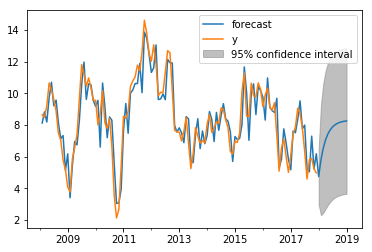

In [13]:
arma_model.plot_predict(1,n+12); plt.show()

## <center> ARIMA

<center> Combines AR and MA components as well as an <b> Integrated </b> component which accounts for trends.

<center>AR, MA, and ARMA models require stationarity. <br>
ARIMA models can handle non-stationary time series due to the <b>I</b> component.

In [14]:
## ARIMA
n = 12*10
mu = 8
phi = 0.7
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + errors[i] + theta*errors[i-1] + 0.05*i  if i>1 else mu + phi + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

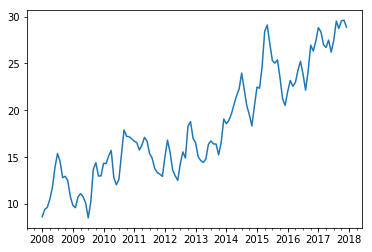

In [15]:
time_series.plot()

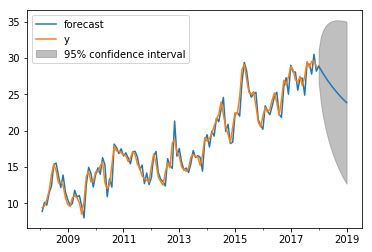

In [16]:
arma_model = ARMA(time_series, order=(1,1)).fit()
arma_model.plot_predict(1,n+12); plt.show()

In [17]:
from statsmodels.tsa.arima_model import ARIMA

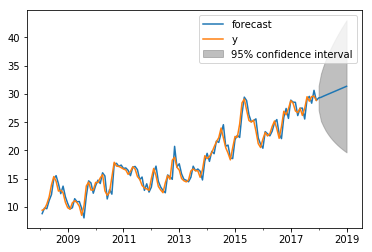

In [18]:
arima_model = ARIMA(time_series, order=(1,1,1)).fit()
arima_model.plot_predict(1,n+12); plt.show()

## <center> Determining the orders of ARIMA

<center> p = AR component <br>
d = I component (differencing)<br>
q = MA component

In [29]:
n = 12*10
mu = 8
phi = 0.15
phi_2 = 0.60
theta = 3.5
noise_weight = 0.25
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu  + phi*(data[i-1]-mu) + phi_2*(data[i-2]-mu) + errors[i-1]*theta + errors[i] + 0.05*i  if i>2 else mu + phi + phi_2 + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

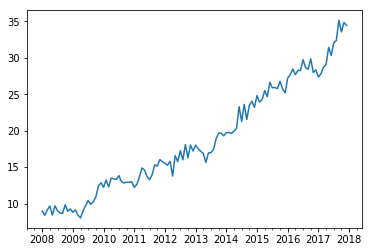

In [30]:
time_series.plot()

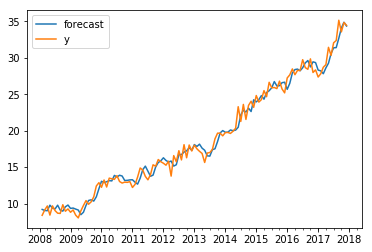

In [32]:
## fitting model on all but last year of data
arima_model = ARIMA(time_series, order=(1,1,1)).fit()
arima_model.plot_predict(1); plt.show()

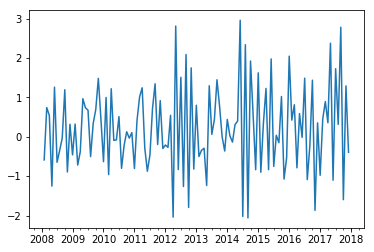

In [33]:
time_series.diff().plot()

AIC: 318.5377381200045
BIC: 329.6542320924506


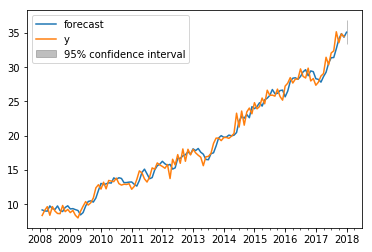

In [34]:
arima_model = ARIMA(time_series, order=(1,1,1)).fit()
forecast = arima_model.forecast()[0]
actual = time_series[n-12:n]
print('AIC:',arima_model.aic)
print('BIC:', arima_model.bic)
arima_model.plot_predict(1,n); plt.show()

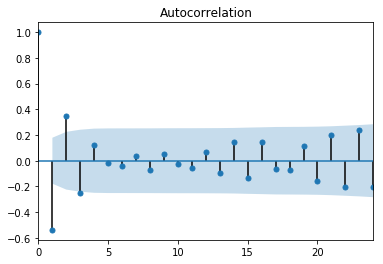

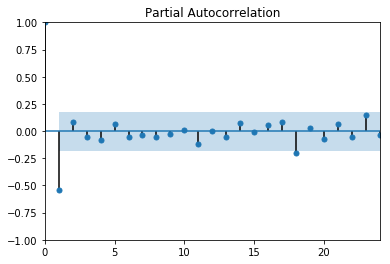

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(time_series.diff().bfill()); plt.xlim(0,24); plt.show()
plot_pacf(time_series.diff().bfill()); plt.xlim(0,24); plt.ylim(-1,1);plt.show()

<center> Determining orders of AR and MA from ACF and PACF <br>
 <br>
<center> <a href="https://people.duke.edu/~rnau/411arim3.htm"> https://people.duke.edu/~rnau/411arim3.htm </a>

AIC: 328.1562158697429
BIC: 336.4935863490775


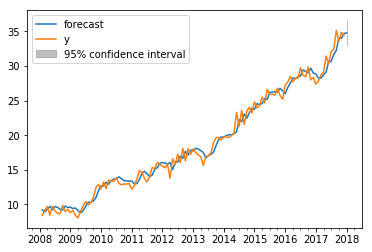

In [39]:
arima_model = ARIMA(time_series, order=(0,1,1)).fit()
forecast = arima_model.forecast()[0]
print('AIC:',arima_model.aic)
print('BIC:', arima_model.bic)
arima_model.plot_predict(1,n); plt.show()

## <center> Seasonal ARIMA (SARIMA)

<center> Adds a seasonal component with its own set of parameters.

<center> SARIMA (p,d,q) (P,D,Q,m)

In [2]:
n = 12*10
mu = 8
phi = 0.12
phi_2 = 0.08
theta = 2
noise_weight = 1.5
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
for i,x in enumerate(values):
    data.append(3*date_vals[i].month + mu + phi*(data[i-1]-mu) + phi_2*(data[i-2]-mu) + errors[i] + theta*errors[i-1] + 0.05*i  if i>2 else mu + phi + phi_2 + errors[i])
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

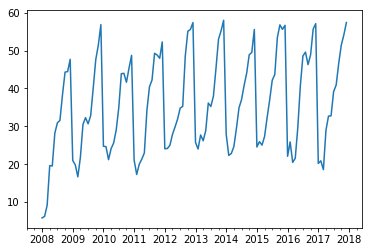

In [51]:
time_series.plot()

AIC: 784.6866265752149
BIC: 795.4151514837117
Forecast MSE: 292.1861730697156


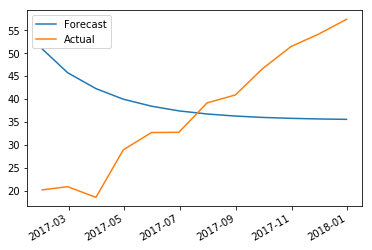

In [52]:
from sklearn.metrics import mean_squared_error
arima_model = ARIMA(time_series[0:-12], order=(1,0,1)).fit()
forecast = arima_model.forecast(steps=12)[0]
actual = time_series[n-12:n]
print('AIC:',arima_model.aic)
print('BIC:', arima_model.bic)
print('Forecast MSE:', mean_squared_error(actual, forecast))
plt.plot(date_vals[n-12:n],forecast)
actual.plot(); plt.legend(['Forecast','Actual'])

AIC: 663.4012236365556
BIC: 674.0925389744033
Forecast MSE: 39.21238487302515


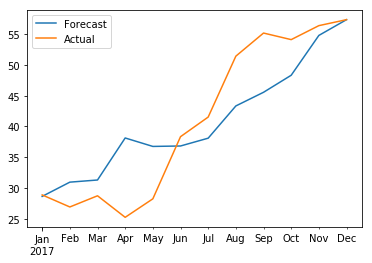

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(time_series[0:-12], order=(1,1,1), seasonal_order=(1,0,0,12)).fit()
forecast = sarima.forecast(steps=12)
actual = time_series[n-12:n]
print('AIC:',sarima.aic)
print('BIC:', sarima.bic)
print('Forecast MSE:', mean_squared_error(actual, forecast))
forecast.plot();actual.plot();plt.legend(['Forecast','Actual'])

## <center> Activity

<center>Using the data found in <i>price_data.csv</i> fit an appropriate time series model.<br><br>
Train the model on the first 4 years of data and test the model on the most recent year.

In [3]:
df = pd.read_csv('price_data.csv')
df.head()

,Price,Date
0,831.778264,2014-01-05
1,867.773599,2014-01-12
2,845.039424,2014-01-19
3,763.656101,2014-01-26
4,798.905688,2014-02-02


In [4]:
df.index = pd.DatetimeIndex(df['Date'])
df.drop('Date', axis=1, inplace=True)
df.head()

,Price
Date,
2014-01-05,831.778264
2014-01-12,867.773599
2014-01-19,845.039424
2014-01-26,763.656101
2014-02-02,798.905688


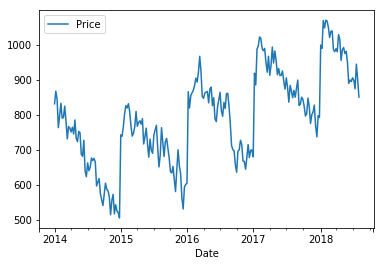

In [5]:
df.plot()

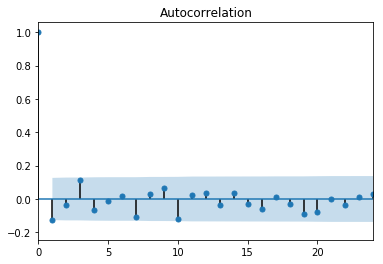

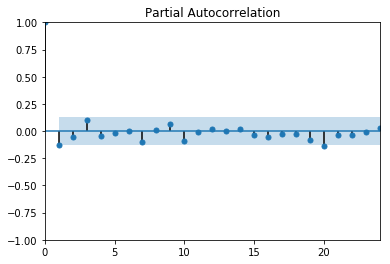

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df.diff().bfill()); plt.xlim(0,24); plt.show()
plot_pacf(df.diff().bfill()); plt.xlim(0,24); plt.ylim(-1,1);plt.show()

In [18]:
arima_model = SARIMAX(df[0:-52], order=(3,0,1), seasonal_order=(1,1,0,52)).fit()
forecast = arima_model.forecast(steps=52)
actual = df[-52:]

C:\Users\Matthew\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


AIC: 1460.638052566624
BIC: 1478.1139818810404
Forecast MSE: 2177.0310243509716


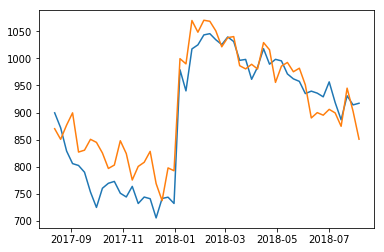

In [19]:
print('AIC:',arima_model.aic)
print('BIC:', arima_model.bic)
print('Forecast MSE:', mean_squared_error(actual, forecast))
plt.plot(df.index[-52:],forecast)
plt.plot(df.index[-52:],df[-52:]['Price'])

In [9]:
!pip install pyramid-arima
from pyramid.arima import auto_arima

C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Matthew\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Matthew\Anaconda3\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. Th

In [36]:
model = auto_arima(df[:-52], trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=52)
model.fit(df[:-52])
forecast = model.predict(n_periods=52)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=1972.680, BIC=1979.142, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=1966.577, BIC=1979.501, Fit time=3.675 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=1971.784, BIC=1981.477, Fit time=0.118 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 52); AIC=1967.755, BIC=1983.911, Fit time=16.621 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=1969.000, BIC=1978.693, Fit time=1.435 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=1965.303, BIC=

AIC: 1962.8893822229093
BIC: 1988.738251157746
Forecast MSE: 4615.015319841796


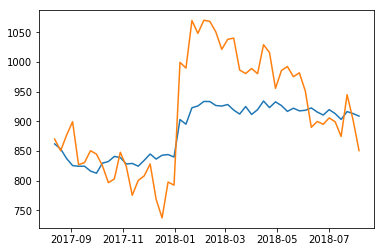

In [41]:
print('AIC:',model.aic())
print('BIC:', model.bic())
print('Forecast MSE:', mean_squared_error(actual, forecast))
plt.plot(df.index[-52:],forecast)
plt.plot(df.index[-52:],df[-52:]['Price'])